In [1]:
%matplotlib inline

In [2]:
## Boiler plate code common to many notebooks.  See the TestFilesCommonCode.ipynb for details
from __future__ import print_function
%run TestFilesCommonCode.ipynb

SimpleITK Version: 0.9.1
Compiled: Sep 28 2015 10:07:41



In [3]:
import nibabel as nib
import dipy.io
import scipy.io # for writing the mat files
import numpy as np

In [4]:
'''
dti_scan_1='/scratch/TESTS/dti_errors/inputs/DTI_34504.nii.gz'
dti_scan_2='/scratch/TESTS/dti_errors/inputs/DTI_83611.nii.gz'

img1 = nib.load(dti_scan_1)
data1 = img1.get_data()

img2 = nib.load(dti_scan_2)
data2 = img2.get_data()

mid_slice_idx = data1.shape[2]/2
data1_2d = data1[:,:,mid_slice_idx,:,:]
data2_2d = data2[:,:,mid_slice_idx,:,:]
'''

"\ndti_scan_1='/scratch/TESTS/dti_errors/inputs/DTI_34504.nii.gz'\ndti_scan_2='/scratch/TESTS/dti_errors/inputs/DTI_83611.nii.gz'\n\nimg1 = nib.load(dti_scan_1)\ndata1 = img1.get_data()\n\nimg2 = nib.load(dti_scan_2)\ndata2 = img2.get_data()\n\nmid_slice_idx = data1.shape[2]/2\ndata1_2d = data1[:,:,mid_slice_idx,:,:]\ndata2_2d = data2[:,:,mid_slice_idx,:,:]\n"

In [66]:
'''
RISOutputMatFileName='FA_distance.mat'

RIS_1_fn='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/34504/Outputs/DTI_RIS/FA.nrrd'
RIS_2_fn='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/83611/Outputs/DTI_RIS/FA.nrrd'

# first read FA images and check which mid axial slice is the best 2D representation
RIS1=sitk.ReadImage(RIS_1_fn)
RIS1_2d = RIS1[:,:,RIS1.GetSize()[2]/2]
myshow(RIS1_2d)

RIS2=sitk.ReadImage(RIS_2_fn)
RIS2_2d = RIS2[:,:,RIS2.GetSize()[2]/2]
myshow(RIS2_2d)

# resample RIS2 to RIS1
#resFilt = sitk.ResampleImageFilter()
#resFilt.SetReferenceImage(RIS1_2d)
#resFilt.SetInterpolator(sitk.sitkNearestNeighbor)
#RIS2_2d = resFilt.Execute(RIS2_2d)
#myshow(RIS1_2d)
#myshow(RIS2_2d)

#RIS_diff_2d = abs(RIS1_2d-RIS2_2d)
#
# OR
#
RIS_diff_2d = sitk.Image([RIS1.GetSize()[0],RIS1.GetSize()[1]], sitk.sitkFloat32)
RIS_diff_2d.CopyInformation(RIS1_2d)

for i in xrange(RIS_diff_2d.GetSize()[0]):
    for j in xrange(RIS_diff_2d.GetSize()[1]):
        RIS_diff_2d[i,j] = abs(RIS1_2d[i,j]-RIS2_2d[i,j])

myshow(RIS_diff_2d)

RIS_arr = sitk.GetArrayFromImage(RIS_diff_2d)
scipy.io.savemat(os.path.join(OUTPUT_DIR,RISOutputMatFileName), mdict={'inputImage': RIS_arr})
'''

"\nRISOutputMatFileName='FA_distance.mat'\n\nRIS_1_fn='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/34504/Outputs/DTI_RIS/FA.nrrd'\nRIS_2_fn='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/83611/Outputs/DTI_RIS/FA.nrrd'\n\n# first read FA images and check which mid axial slice is the best 2D representation\nRIS1=sitk.ReadImage(RIS_1_fn)\nRIS1_2d = RIS1[:,:,RIS1.GetSize()[2]/2]\nmyshow(RIS1_2d)\n\nRIS2=sitk.ReadImage(RIS_2_fn)\nRIS2_2d = RIS2[:,:,RIS2.GetSize()[2]/2]\nmyshow(RIS2_2d)\n\n# resample RIS2 to RIS1\n#resFilt = sitk.ResampleImageFilter()\n#resFilt.SetReferenceImage(RIS1_2d)\n#resFilt.SetInterpolator(sitk.sitkNearestNeighbor)\n#RIS2_2d = resFilt.Execute(RIS2_2d)\n#myshow(RIS1_2d)\n#myshow(RIS2_2d)\n\n#RIS_diff_2d = abs(RIS1_2d-RIS2_2d)\n#\n# OR\n#\nRIS_diff_2d = sitk.Image([RIS1.GetSize()[0],RIS1.GetSize()[1]], sitk.sitkFloat32)\nRIS_diff_2d.CopyInformation(RIS1_2d)\n\nfor i in xrange(RIS_diff_2d.GetSize()[0]):\n    for j in xrange(RIS

In [5]:
#dwi_1='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/34504/Outputs/CorrectedDWI_in_T2Space.nrrd'
#dwi_2='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/83611/Outputs/CorrectedDWI_in_T2Space.nrrd'
#
# following scans need allowLossyConversion flag because input has float type but output has short type
dwi_1='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/34504/Outputs/DWI_Corrected_Aligned_CS.nrrd'
dwi_2='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/83611/Outputs/DWI_Corrected_Aligned_CS.nrrd'


NIFTI_DIR='/scratch/TESTS/dti_errors/dwi_nifti'

PROGRAM_PATH='/scratch/BS/release-20160211/bin'

print("Making nifti formatted data")

import subprocess

arg1='--inputVolume'+' '+str(dwi_1)
arg2='--conversionMode NrrdToFSL'
arg3='--outputVolume'+' '+os.path.join(NIFTI_DIR,'34504_FSL.nii.gz')
arg4='--allowLossyConversion'
subprocess.call([os.path.join(PROGRAM_PATH,'DWIConvert'), arg1, arg2, arg3, arg4])

arg1='--inputVolume'+' '+str(dwi_2)
arg2='--conversionMode NrrdToFSL'
arg3='--outputVolume'+' '+os.path.join(NIFTI_DIR,'83611_FSL.nii.gz')
arg4='--allowLossyConversion'
subprocess.call([os.path.join(PROGRAM_PATH,'DWIConvert'), arg1, arg2, arg3, arg4])

Making nifti formatted data


0

In [6]:
dwi_nifti_1 = os.path.join(NIFTI_DIR,'34504_FSL.nii.gz')
fbvec_1 = os.path.join(NIFTI_DIR,'34504_FSL.bvec')
fbval_1 = os.path.join(NIFTI_DIR,'34504_FSL.bval')

dwi_nifti_2 = os.path.join(NIFTI_DIR,'83611_FSL.nii.gz')
fbvec_2 = os.path.join(NIFTI_DIR,'83611_FSL.bvec')
fbval_2 = os.path.join(NIFTI_DIR,'83611_FSL.bval')

In [7]:
# read image 1
import nibabel as nib
img1 = nib.load(dwi_nifti_1)
data1 = img1.get_data()

from dipy.io import read_bvals_bvecs
bvals1, bvecs1 = read_bvals_bvecs(fbval_1, fbvec_1)

from dipy.core.gradients import gradient_table
gtab1 = gradient_table(bvals1, bvecs1)

from dipy.reconst.dti import TensorModel
ten1 = TensorModel(gtab1)
tenfit1 = ten1.fit(data1)

from dipy.reconst.dti import fractional_anisotropy
fa1 = fractional_anisotropy(tenfit1.evals)
fa1[np.isnan(fa1)] = 0
fa1 = np.clip(fa1, 0, 1)

from dipy.reconst.dti import color_fa
cfa1 = color_fa(fa1, tenfit1.evecs)

In [8]:
# repeat for image 2
img2 = nib.load(dwi_nifti_2)
data2 = img2.get_data()

bvals2, bvecs2 = read_bvals_bvecs(fbval_2, fbvec_2)
gtab2 = gradient_table(bvals2, bvecs2)
ten2 = TensorModel(gtab2)
tenfit2 = ten2.fit(data2)

fa2 = fractional_anisotropy(tenfit2.evals)
fa2[np.isnan(fa2)] = 0
fa2 = np.clip(fa2, 0, 1)
cfa2 = color_fa(fa2, tenfit2.evecs)

In [9]:
print(data1.shape)
print(data2.shape)

(128, 128, 70, 82)
(128, 128, 70, 82)


In [36]:
#
# http://nipy.org/dipy/reference/dipy.reconst.html#dipy.reconst.dti.TensorFit
#
# some tests
if(0):
    # see tensor values in position 0,0,0
    print(tenfit1[0,0,0].lower_triangular()) # or tenfit1.lower_triangular()[0,0,0]
    # see tensor eigenvalues in position 0
    print(tenfit1[0,0,0].evals) # or tenfit1.evals[0,0,0]
    # see tensor eigenvectors in position 0
    print(tenfit1[0,0,0].evecs) # or tenfit1.evecs[0,0,0]
    # see FA in position 0
    print(tenfit1[0,0,0].fa) # or tenfit1.fa[0,0,0]
    print(tenfit1[0,0,0].md)
    print(tenfit1[0,0,0].directions)
    print(tenfit1[0,0,0].mode)
    print(tenfit1[0,0,0].quadratic_form)
    #
    a1 = tenfit1[0,0,0].lower_triangular() # array 1, a 6 parameters vector
    t1 = np.matrix([[a1[0],a1[1],a1[3]],
                    [a1[1],a1[2],a1[4]],
                    [a1[3],a1[4],a1[5]]]) # tensor 1, it is row-wise lower triangular
    print(t1) # compare this with quadratic_form!

In [11]:
# define projection metric
#
import operator

def angle_between(e1, e2):
    # e1 and e2 are eigenvectors so they are unit vectors
    return np.arccos(np.dot(e1, e2))

# first, map each eigenvector of A to one eigenvector of B with smallest angular difference

def angular_difference(w_A,v_A,w_B,v_B): # w_A: eigenvalues of A, v_A: eigenvectors of A
    indx_range = range(3)
    #
    v_A_0 = np.array(v_A[:,0]).ravel()
    # gives the index of tensor B eigenvector that has the minimum angular difference to the current eigenvector of tensor A
    idx, ang0 = min(enumerate(angle_between(v_A_0,np.array(v_B[:,i]).ravel()) for i in indx_range), key=operator.itemgetter(1))
    #idx = np.array([angle_between(v_A_0,np.array(v_B[:,i]).ravel()) for i in indx_range]).argmin()
    ang0_idx = indx_range[idx]
    indx_range.remove(ang0_idx)
    #
    v_A_1 = np.array(v_A[:,1]).ravel()
    idx, ang1 = min(enumerate(angle_between(v_A_1,np.array(v_B[:,i]).ravel()) for i in indx_range), key=operator.itemgetter(1))
    #idx = np.array([angle_between(v_A_1,np.array(v_B[:,i]).ravel()) for i in indx_range]).argmin()
    ang1_idx = indx_range[idx]
    indx_range.remove(ang1_idx)
    #
    v_A_2 = np.array(v_A[:,2]).ravel()
    idx, ang2 = min(enumerate(angle_between(v_A_2,np.array(v_B[:,i]).ravel()) for i in indx_range), key=operator.itemgetter(1))
    #idx = np.array([angle_between(v_A_2,np.array(v_B[:,i]).ravel()) for i in indx_range]).argmin()
    ang2_idx = indx_range[idx]
    indx_range.remove(ang2_idx)
    angle_array = [ang0,ang1,ang2]
    index_array = [ang0_idx,ang1_idx,ang2_idx]
    #print([angle_array[i]*(180/np.pi) for i in range(len(angle_array))],index_array)
    return angle_array, index_array

def projection_metric(tenfit_A, tenfit_B):
    w_A = tenfit_A.evals # eigenvaluse
    v_A = tenfit_A.evecs # eigenvectors
    w_B = tenfit_B.evals # eigenvaluse
    v_B = tenfit_B.evecs # eigenvectors
    angle_array, index_array = angular_difference(w_A,v_A,w_B,v_B)
    B_proj_A = np.sqrt(sum((w_A[i]-(w_B[index_array[i]]*np.cos(angle_array[i])))**2 for i in range(3)))
    #print(B_proj_A)
    A_proj_B = np.sqrt(sum(((w_A[i]*np.cos(angle_array[i]))-w_B[index_array[i]])**2 for i in range(3)))
    #print(A_proj_B)
    metric_value = 0.5*(B_proj_A+A_proj_B)
    #print(metric_value)
    return metric_value

In [12]:
# test
projection_metric(tenfit1[0,0,0],tenfit2[0,0,0])

6.9006008269674438e-12

In [34]:
# Frobenius distance
def distance_euclid(tenfit_A, tenfit_B):
    return np.linalg.norm(tenfit_A.quadratic_form - tenfit_B.quadratic_form, ord='fro')

In [35]:
distance_euclid(tenfit1[64,64,35],tenfit2[64,64,35])

0.0012167293932256525

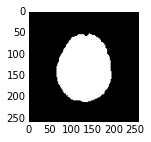

In [15]:
# Now set direction cosign of all images to identity
def ForceDCtoID(inputVolume):
    import os
    import SimpleITK as sitk
    inputVolume.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))
    return inputVolume

def ForceOriginToZero(inputVolume):
    import os
    import SimpleITK as sitk
    inputVolume.SetOrigin((0.0, 0.0, 0.0))
    return inputVolume

# mask names
mask1_fn='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/34504/Outputs/BrainMaskForDWI.nrrd'
mask2_fn='/Shared/johnsonhj/HDNI/20150319_DWIProcessing/Results/PHD_024/0029/83611/Outputs/BrainMaskForDWI.nrrd'

mask1 = sitk.ReadImage(mask1_fn)
mask1 = ForceDCtoID(mask1)
mask1 = ForceOriginToZero(mask1)

mask2 = sitk.ReadImage(mask2_fn)
mask2 = ForceDCtoID(mask2)
mask2 = ForceOriginToZero(mask2)

# resample mask2 to mask1
#resFilt = sitk.ResampleImageFilter()
#resFilt.SetReferenceImage(mask1)
#resFilt.SetInterpolator(sitk.sitkNearestNeighbor)
#mask2 = resFilt.Execute(mask2)

mask = sitk.Or(mask1, mask2) # or bitwise of both masks

k = mask.GetSize()[2]/2 # mid-axial slice
mask = mask[:,:,k]

myshow(mask)

In [16]:
# create a  2D scalar distance image
size_x = data1.shape[0] # x_size
size_y = data1.shape[1] # y_size
fa_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
fa_distance_image.CopyInformation(mask)
md_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
md_distance_image.CopyInformation(mask)
rd_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
rd_distance_image.CopyInformation(mask)
ad_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
ad_distance_image.CopyInformation(mask)
projection_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
projection_distance_image.CopyInformation(mask)
frobenius_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
frobenius_distance_image.CopyInformation(mask)

In [17]:
k = data1.shape[2]/2 # mid-axial slice
for i in xrange(data1.shape[0]):
    for j in xrange(data1.shape[1]):
        fa_distance_image[i,j] = abs(tenfit1[i,j,k].fa - tenfit2[i,j,k].fa)
        md_distance_image[i,j] = abs(tenfit1[i,j,k].md - tenfit2[i,j,k].md)
        rd_distance_image[i,j] = abs(tenfit1[i,j,k].rd - tenfit2[i,j,k].rd)
        ad_distance_image[i,j] = abs(tenfit1[i,j,k].ad - tenfit2[i,j,k].ad)
        projection_distance_image[i,j] = projection_metric(tenfit1[i,j,k], tenfit2[i,j,k])
        frobenius_distance_image[i,j] = distance_euclid(tenfit1[i,j,k], tenfit2[i,j,k])

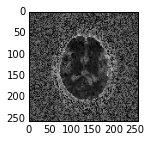

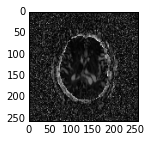

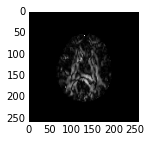

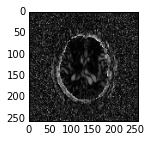

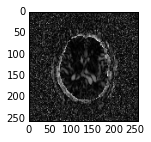

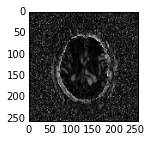

In [18]:
myshow(projection_distance_image)
myshow(frobenius_distance_image)
myshow(fa_distance_image)
myshow(md_distance_image)
myshow(rd_distance_image)
myshow(ad_distance_image)

In [19]:
mask = sitk.Cast(mask, sitk.sitkFloat32)

fa_distance_image = sitk.Multiply(fa_distance_image,mask)
md_distance_image = sitk.Multiply(md_distance_image,mask)
rd_distance_image = sitk.Multiply(rd_distance_image,mask)
ad_distance_image = sitk.Multiply(ad_distance_image,mask)
frobenius_distance_image = sitk.Multiply(frobenius_distance_image,mask)
projection_distance_image = sitk.Multiply(projection_distance_image,mask)

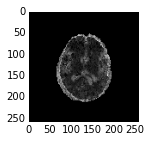

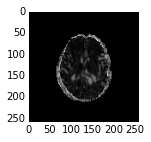

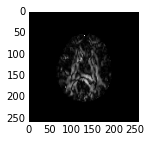

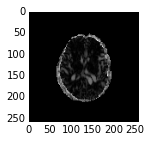

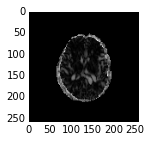

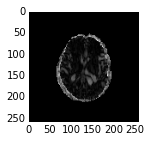

In [20]:
myshow(projection_distance_image)
myshow(frobenius_distance_image)
myshow(fa_distance_image)
myshow(md_distance_image)
myshow(rd_distance_image)
myshow(ad_distance_image)

In [21]:
OUTPUT_DIR='/scratch/TESTS/dti_errors'

fa_distance_arr = sitk.GetArrayFromImage(fa_distance_image)
scipy.io.savemat(os.path.join(OUTPUT_DIR,'FA_distance.mat'), mdict={'inputImage': fa_distance_arr})

md_distance_arr = sitk.GetArrayFromImage(md_distance_image)
scipy.io.savemat(os.path.join(OUTPUT_DIR,'MD_distance.mat'), mdict={'inputImage': md_distance_arr})

rd_distance_arr = sitk.GetArrayFromImage(rd_distance_image)
scipy.io.savemat(os.path.join(OUTPUT_DIR,'RD_distance.mat'), mdict={'inputImage': rd_distance_arr})

ad_distance_arr = sitk.GetArrayFromImage(ad_distance_image)
scipy.io.savemat(os.path.join(OUTPUT_DIR,'AD_distance.mat'), mdict={'inputImage': ad_distance_arr})

projection_distance_arr = sitk.GetArrayFromImage(projection_distance_image)
scipy.io.savemat(os.path.join(OUTPUT_DIR,'projection_distance.mat'), mdict={'inputImage': projection_distance_arr})

# Other metrics

In [50]:
# Log-Euclidian distance
from scipy.linalg import logm

def fro_norm(A,B):
    return np.linalg.norm(A-B, ord='fro')

def distance_logeuclid(tenfit_A, tenfit_B):
    return fro_norm(logm(tenfit_A.quadratic_form),logm(tenfit_B.quadratic_form))

# Reimannian distance
# eigenvalsh(A,B) is joint eigenvalues of A and B
from scipy.linalg import eigvalsh

def distance_reimann(tenfit_A, tenfit_B):
    return np.sqrt((np.log(eigvalsh(tenfit_A.quadratic_form,tenfit_B.quadratic_form))**2).sum())

# Kullback-Leibler distance
def distance_kullback(tenfit_A, tenfit_B):
    A = tenfit_A.quadratic_form
    B = tenfit_B.quadratic_form
    dim = A.shape[0]
    kl = np.sqrt(np.trace(np.dot(np.linalg.inv(A),B)+np.dot(np.linalg.inv(B),A))-2*dim)
    return 0.5*kl

In [51]:
logeuclid_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
logeuclid_distance_image.CopyInformation(mask)

reimann_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
reimann_distance_image.CopyInformation(mask)

kullback_distance_image = sitk.Image([size_x,size_y], sitk.sitkFloat32)
kullback_distance_image.CopyInformation(mask)

In [53]:
k = data1.shape[2]/2 # mid-axial slice
for i in xrange(data1.shape[0]):
    for j in xrange(data1.shape[1]):
        logeuclid_distance_image[i,j] = distance_logeuclid(tenfit1[i,j,k], tenfit2[i,j,k])
        reimann_distance_image[i,j] = distance_reimann(tenfit1[i,j,k], tenfit2[i,j,k])
        kullback_distance_image[i,j] = distance_kullback(tenfit1[i,j,k], tenfit2[i,j,k])

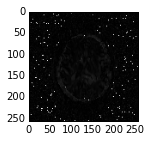

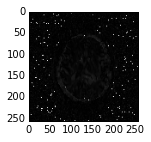

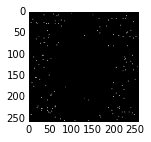

In [54]:
myshow(logeuclid_distance_image)
myshow(reimann_distance_image)
myshow(kullback_distance_image)

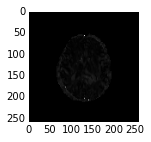

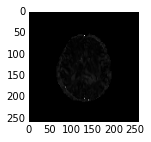

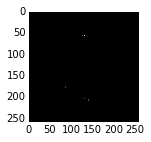

In [55]:
logeuclid_distance_image = sitk.Multiply(logeuclid_distance_image,mask)
reimann_distance_image = sitk.Multiply(reimann_distance_image,mask)
kullback_distance_image = sitk.Multiply(kullback_distance_image,mask)
myshow(logeuclid_distance_image)
myshow(reimann_distance_image)
myshow(kullback_distance_image)

In [56]:
logeuclid_distance_arr = sitk.GetArrayFromImage(logeuclid_distance_image)
scipy.io.savemat(os.path.join(OUTPUT_DIR,'logeuclid_distance.mat'), mdict={'inputImage': logeuclid_distance_arr})

reimann_distance_arr = sitk.GetArrayFromImage(reimann_distance_image)
scipy.io.savemat(os.path.join(OUTPUT_DIR,'reimann_distance.mat'), mdict={'inputImage': reimann_distance_arr})

kullback_distance_arr = sitk.GetArrayFromImage(kullback_distance_image)
scipy.io.savemat(os.path.join(OUTPUT_DIR,'kullback_distance.mat'), mdict={'inputImage': kullback_distance_arr})

In [57]:
print(kullback_distance_arr[55:65,55:65])

[[ 0.53565705  0.42179927  0.40142152  0.1980767   0.37630954  1.11958814
   4.92385483  0.43872941  0.34276184  0.09819658]
 [ 0.48782274  0.47421271  0.56475896  0.30516261  0.49433616  1.3548243
   1.73766398  0.95787698  0.25806078  0.1623988 ]
 [ 0.37115097  0.6871137   0.5730899   0.95984262  2.28632307  1.56891918
   1.37909627  1.02898014  0.21758009  0.12790513]
 [ 0.33195022  0.8984189   0.57051528  0.43605605  0.79055011  1.19734228
   1.26572323  1.02551877  0.23780294  0.16470326]
 [ 0.66182023  0.4142912   0.37967068  0.69162822  0.43317622  0.82315862
   1.17655003  0.97283006  0.43619168  0.36458007]
 [ 0.40314668  0.55125397  0.42444772  0.3675988   0.30013254  0.47011808
   0.9014833   0.78510928  0.69433904  0.66378063]
 [ 2.41730022  0.5276317   0.51767814  0.31096306  0.15682039  0.21458334
   0.4426991   0.58913332  0.85605794  0.86913347]
 [ 0.4947854   0.6365307   0.57755405  0.24648938  0.10732803  0.09992542
   0.25382632  0.35851261  0.90996826  1.01479232]
 

# Display ODFs

Computing tensor ellipsoids in a part of image
Saving illustration as tensor_ellipsoids1.png


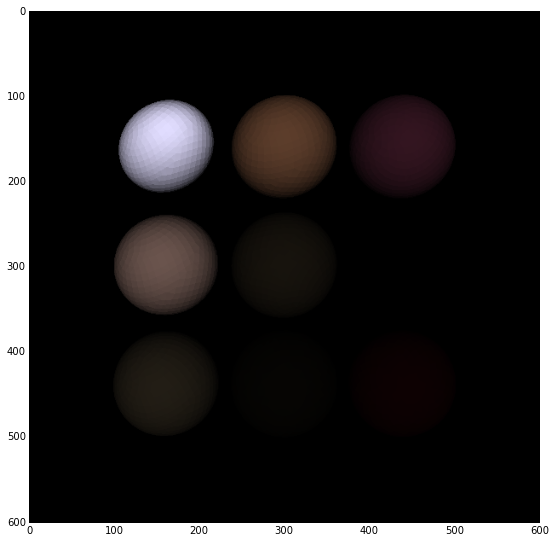

In [58]:
print('Computing tensor ellipsoids in a part of image')

from dipy.data import get_sphere
sphere = get_sphere('symmetric724')

from dipy.viz import fvtk
ren = fvtk.ren()

evals = tenfit1.evals[45:48, 50:53, 35:36]
evecs = tenfit1.evecs[45:48, 50:53, 35:36]

cfa = cfa1[45:48, 50:53, 35:36]
cfa /= cfa.max() 

fvtk.add(ren, fvtk.tensor(evals, evecs, cfa, sphere))
print('Saving illustration as tensor_ellipsoids1.png')
fvtk.record(ren, n_frames=1, out_path=os.path.join(OUTPUT_DIR,'tensor_ellipsoids1.png'), size=(600, 600))

tensor_img1 = sitk.ReadImage(os.path.join(OUTPUT_DIR,'tensor_ellipsoids1.png'))
myshow(tensor_img1)

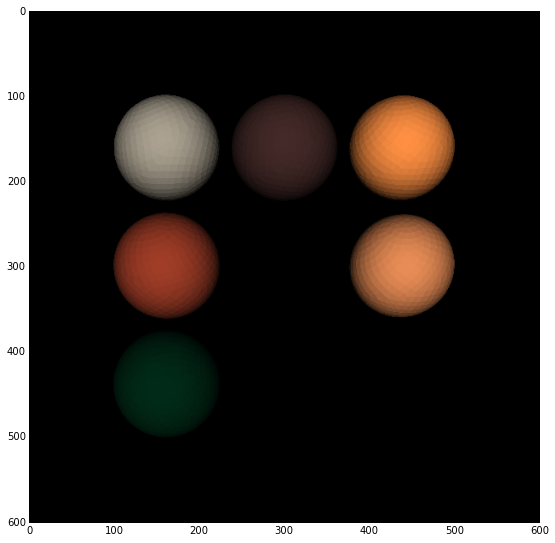

In [59]:
fvtk.clear(ren)

evals = tenfit2.evals[45:48, 50:53, 35:36]
evecs = tenfit2.evecs[45:48, 50:53, 35:36]

cfa = cfa2[45:48, 50:53, 35:36]
cfa /= cfa.max() 

fvtk.add(ren, fvtk.tensor(evals, evecs, cfa, sphere))
fvtk.record(ren, n_frames=1, out_path=os.path.join(OUTPUT_DIR,'tensor_ellipsoids2.png'), size=(600, 600))

tensor_img2 = sitk.ReadImage(os.path.join(OUTPUT_DIR,'tensor_ellipsoids2.png'))
myshow(tensor_img2)

In [60]:
projection_distance_arr_crop = projection_distance_arr[50:53, 45:48]
scipy.io.savemat(os.path.join(OUTPUT_DIR,'projection_distance_crop.mat'), mdict={'inputImage': projection_distance_arr_crop})

In [62]:
print(projection_distance_arr_crop)

[[ 0.00143904  0.00499711  0.00377127]
 [ 0.00192952  0.00096605  0.00186434]
 [ 0.00278694  0.0020804   0.0037166 ]]


In [63]:
projection_metric(tenfit1[46,51,35],tenfit2[46,51,35])

0.28623740410217369

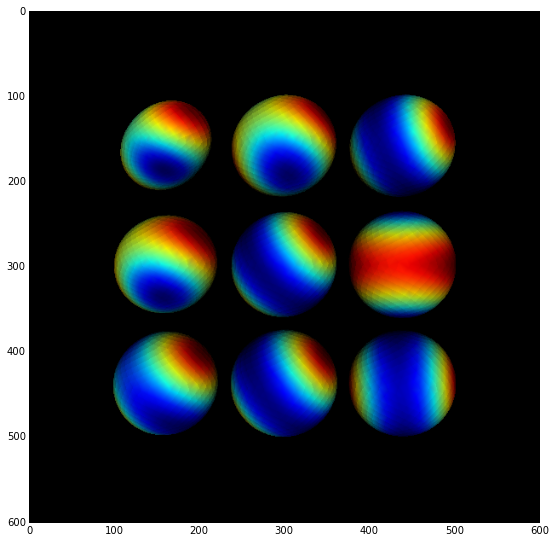

In [64]:
fvtk.clear(ren)

cfa = cfa1[45:48, 50:53, 35:36]
cfa /= cfa.max() 

tensor_odfs = tenfit1[45:48, 50:53, 35:36].odf(sphere)

fvtk.add(ren, fvtk.sphere_funcs(tensor_odfs, sphere, cfa))
fvtk.record(ren, n_frames=1, out_path=os.path.join(OUTPUT_DIR,'tensor_odfs1.png'), size=(600, 600))

odf_img1 = sitk.ReadImage(os.path.join(OUTPUT_DIR,'tensor_odfs1.png'))
myshow(odf_img1)

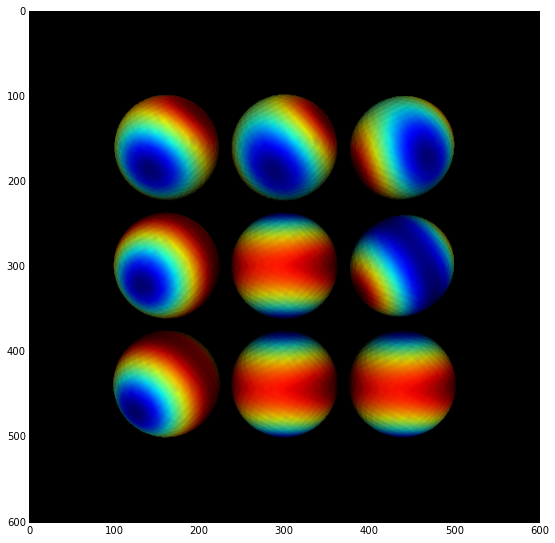

In [65]:
fvtk.clear(ren)

cfa = cfa2[45:48, 50:53, 35:36]
cfa /= cfa.max() 

tensor_odfs = tenfit2[45:48, 50:53, 35:36].odf(sphere)

fvtk.add(ren, fvtk.sphere_funcs(tensor_odfs, sphere, cfa2))
fvtk.record(ren, n_frames=1, out_path=os.path.join(OUTPUT_DIR,'tensor_odfs2.png'), size=(600, 600))

odf_img2 = sitk.ReadImage(os.path.join(OUTPUT_DIR,'tensor_odfs2.png'))
myshow(odf_img2)

In [ ]:
print(tenfit1[46,51,35].lower_triangular())
print(tenfit2[46,51,35].lower_triangular())

In [ ]:
print(tenfit1[46,52,35].lower_triangular())
print(tenfit2[46,52,35].lower_triangular())